In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Read in the CSV files using pandas
data_2021 = pd.read_csv('2021_stock.csv')
data_2022 = pd.read_csv('2022_stock.csv')

In [3]:
# Convert 'Date' columns to datetime type
data_2021['Date'] = pd.to_datetime(data_2021['Date'], format='%m/%d/%Y')
data_2022['Date'] = pd.to_datetime(data_2022['Date'], format='%m/%d/%Y')

In [4]:
data_2021.rename(columns={'Close_2021': 'Close'}, inplace=True)
data_2022.rename(columns={'Close_2022': 'Close'}, inplace=True)

In [5]:
# Merge the datasets on 'Date'
merged_data = pd.concat([data_2021, data_2022])

In [6]:
merged_data

,Date,Open,High,Low,Close,Volume
0,2021-12-30,57.75,58.74,57.53,58.40,"24,559,000"
1,2021-12-29,57.31,58.03,57.07,57.58,"26,170,221"
2,2021-12-28,59.05,59.45,57.08,58.01,"36,901,699"
3,2021-12-27,58.85,59.38,58.23,59.20,"27,362,580"
4,2021-12-23,59.82,60.08,58.31,58.71,"39,203,199"
...,...,...,...,...,...,...
246,2022-01-07,55.36,55.77,54.63,55.72,"27,703,369"
247,2022-01-06,55.16,55.63,54.49,54.84,"37,000,391"
248,2022-01-05,55.84,56.44,55.37,55.63,"52,956,422"
249,2022-01-04,56.22,56.43,53.94,54.53,"66,993,078"


In [7]:
# Set 'Date' as the index and sort by it
merged_data.set_index('Date', inplace=True)
merged_data.sort_index(inplace=True)

In [8]:
# Resample the data to weekly frequency, aggregating 'Close' values by taking the mean for each week
weekly_data = merged_data[['Close']].resample('W').mean()

In [9]:
# Drop rows with all NaN values (in case there are weeks with no data)
weekly_data.dropna(how='all', inplace=True)

In [10]:
# Drop columns with all NaN values (in case one year has no data for some weeks)
weekly_data.dropna(axis=1, how='all', inplace=True)

In [11]:
weekly_data

,Close
Date,
2021-01-10,37.012
2021-01-17,37.052
2021-01-24,36.565
2021-01-31,36.518
2021-02-07,35.088
...,...
2022-12-04,50.236
2022-12-11,50.836
2022-12-18,52.944


<Axes: xlabel='Date'>

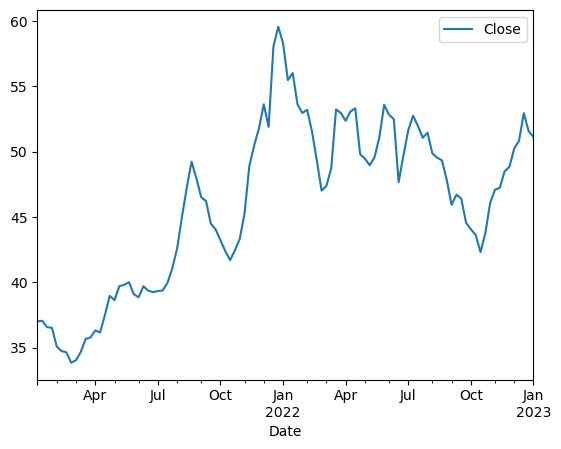

In [12]:
# Plotting the weekly average 'Close' prices
weekly_data.plot()



In [13]:
%store weekly_data

Stored 'weekly_data' (DataFrame)


In [14]:
%store -r weekly_data